In [1]:
import pandas as pd
import networkx as nx

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.rename(columns={'Unnamed: 0': 'ID', 'class': 'label'}, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [4]:
df.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [5]:
sample = df[0:100]

In [6]:
sample.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [7]:
sample

,ID,news,subject,month,day,year,label
0,0,white house presses congress on bill allowing ...,politics,9,21,2016,1
1,1,china urges cooperation after us brands it a c...,politics,12,19,2017,1
2,2,cleveland school officer placed on leave afte...,politics,1,8,2016,0
3,3,syrian democratic forces say reach deir alzor ...,politics,9,10,2017,1
4,4,senator talks all night as democrats fight tru...,politics,4,5,2017,1
...,...,...,...,...,...,...,...
95,95,hillary reveals the one person who made her l...,politics,11,12,2016,0
96,96,cnn hosts panic when congressman lawyer says f...,politics,5,25,2017,0
97,97,calm down democrats are going to stomp trump ...,politics,5,4,2016,0
98,98,usled coalition says still monitoring is convo...,politics,9,1,2017,1


In [8]:
sample['label'].value_counts()

label
1    55
0    45
Name: count, dtype: int64

In [9]:
graph = nx.Graph()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'sample' is your DataFrame containing the news dataset

# Concatenate news content and subject for TF-IDF vectorization
sample['news_text'] = sample['news'] + " " + sample['subject']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(sample['news_text'])
for idx, row in sample.iterrows():
    node_attrs = {
        'content': tfidf_features[idx].toarray(),
        'month': row['month'],
        'day': row['day'],
        'year': row['year'],
    }
    graph.add_node(row['ID'], label = row['label'], **node_attrs)

C:\Users\bishe\AppData\Local\Temp\ipykernel_18100\3519031851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['news_text'] = sample['news'] + " " + sample['subject']


In [11]:
for node, attrs in graph.nodes(data=True):
    print(f"Node {node}:")
    for attr_name, attr_value in attrs.items():
        print(f"{attr_name} : {attr_value}")

Node 0:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 9
day : 21
year : 2016
Node 1:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 12
day : 19
year : 2017
Node 2:
label : 0
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 1
day : 8
year : 2016
Node 3:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 9
day : 10
year : 2017
Node 4:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 4
day : 5
year : 2017
Node 5:
label : 0
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 12
day : 3
year : 2016
Node 6:
label : 0
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 3
day : 28
year : 2016
Node 7:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 1
day : 18
year : 2017
Node 8:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 6
day : 20
year : 2016
Node 9:
label : 0
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 7
day : 4
year : 2016
Node 10:
label : 1
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 10
day : 13
year : 2017
Node 11:
label : 0
content : [[0. 0. 0. ... 0. 0. 0.]]
month : 2


In [12]:
for node, attrs in graph.nodes(data=True):
    if 'label' not in attrs:
        print(f"Node {node}")

In [13]:
label_colors = {
    1: 'blue',
    0: 'red'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in graph.nodes():
    if 'label' in graph.nodes[node]:
        label = graph.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

In [14]:
import matplotlib.pyplot as plt

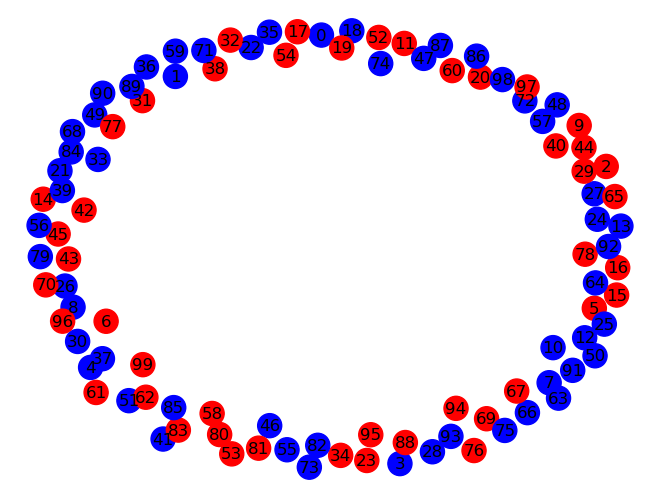

In [15]:
nx.draw(graph, with_labels=True, node_color=node_colors)
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
def get_node_features(graph, node):
    return graph.nodes[node]['content']

In [18]:
def get_node_label(graph, node):
    # Implement a function to retrieve node labels based on your graph structure
    # For example, if node labels are stored as attributes of nodes:
    return graph.nodes[node]['label']

In [19]:
X_train = np.array([get_node_features(graph, node) for node in train_nodes])
y_train = np.array([get_node_label(graph, node) for node in train_nodes])
X_test = np.array([get_node_features(graph, node) for node in test_nodes])
y_test = np.array([get_node_label(graph, node) for node in test_nodes])

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'train_nodes' is not defined